Accuracy Score of GaussianNB() is:
0.8759562841530054
F1 Score of GaussianNB() is:
0.8446269678302533


<ipython-input-335-a6b43b6c4cbf>:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('objid',1,inplace=True)
<ipython-input-335-a6b43b6c4cbf>:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('rerun',1,inplace=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


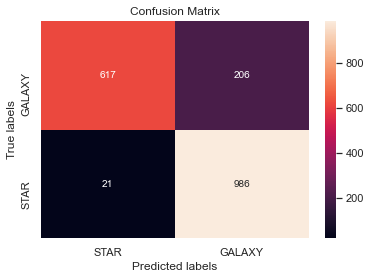

In [335]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Reading file and using as dataframe
path="."
filename_read=os.path.join(path, "skyserver - Original.csv")
df=pd.read_csv(filename_read)

#Check for data types
#df.info()
#Class is of 'object' data type, and no null values

#print(df['class'].value_counts())
#Removing Quasars as we are focussing on classifying Star's and Galaxies
df = df.drop(df[df['class'] == 'QSO'].sample(frac=1.00).index)

#Changing categorical type data to numerical to allow for correlation checks
df['class'] = df['class'].replace({'STAR': 1})
df['class'] = df['class'].replace({'GALAXY': 2})
#print(df['class'].unique())
#print(df.count())

#Deleting obselete columns as they both contain one distinct value
#print(df['objid'].unique())
#print(df['rerun'].unique())
df.drop('objid',1,inplace=True) 
df.drop('rerun',1,inplace=True) 

#Heatmap to visualise correlation between class and features
#plt.figure(figsize=(20,15))
#sns.heatmap(df.corr(),annot=True)

#Reorder column order to put class at the end
df = df[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'redshift', 'plate', 'mjd', 'fiberid', 'class']]
#Set variables X and y to input and target variables
X=df.iloc[:, 0:15]
y=df.iloc[:, 15:16] #Last column is target 'class'

#Split data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X.values, y, test_size=0.2, random_state=42)

#Implement Gaussian model
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)

#Accuracy, F1 Score
print('Accuracy Score of',gnb,'is:')
print(accuracy_score(y_test,y_pred))
print('F1 Score of',gnb,'is:')
print(f1_score(y_test,y_pred))
  
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['STAR', 'GALAXY']); ax.yaxis.set_ticklabels(['GALAXY', 'STAR']);
